# Edge detection on masks

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy.ndimage.morphology import binary_erosion
from scipy.ndimage.filters import gaussian_filter

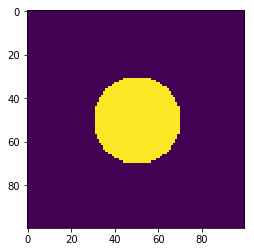

In [3]:
# creat a circular mask
mask = np.zeros((100, 100))
y, x = np.indices((100, 100))
radius = np.sqrt((x - 50) ** 2  + (y - 50) ** 2)
mask[radius < 20] = 1
plt.imshow(mask)

In [4]:
structure = [[0, 1, 0],
             [1, 1, 1],
             [0, 1, 1]]

mask_eroded = binary_erosion(mask, structure=structure)

In [5]:
edge = mask - mask_eroded

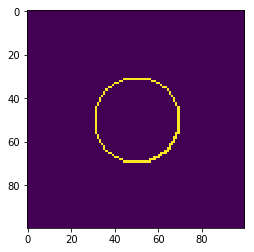

In [6]:
plt.imshow(edge)

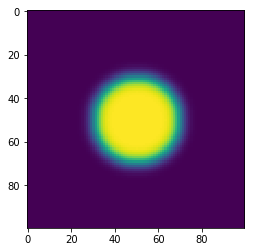

In [7]:
plt.imshow(gaussian_filter(mask, 3))

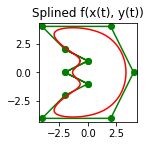

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as si

points = [[-2, 2], [0, 1], [-2, 0], [0, -1], [-2, -2], [-4, -4], [2, -4], [4, 0], [2, 4], [-4, 4]]

degree = 3

points = points + points[0:degree + 1]
points = np.array(points)
n_points = len(points)
x = points[:,0]
y = points[:,1]

t = range(len(x))
ipl_t = np.linspace(1.0, len(points) - degree, 1000)

x_tup = si.splrep(t, x, k=degree, per=1)
y_tup = si.splrep(t, y, k=degree, per=1)
x_list = list(x_tup)
xl = x.tolist()
x_list[1] = [0.0] + xl + [0.0, 0.0, 0.0, 0.0]

y_list = list(y_tup)
yl = y.tolist()
y_list[1] = [0.0] + yl + [0.0, 0.0, 0.0, 0.0]

x_i = si.splev(ipl_t, x_list)
y_i = si.splev(ipl_t, y_list)

#==============================================================================
# Plot
#==============================================================================

fig = plt.figure()

ax = fig.add_subplot(233)
plt.plot(x, y, '-og')
plt.plot(x_i, y_i, 'r')
plt.xlim([min(x) - 0.3, max(x) + 0.3])
plt.ylim([min(y) - 0.3, max(y) + 0.3])
plt.title('Splined f(x(t), y(t))')

plt.show()